In [23]:
# last step: save the exp object to a pkl file
import pickle
import sys 
sys.path.append('codes')
from scipy.optimize import curve_fit
import MyFunctions as mf
import matplotlib.pyplot as plt
import rixs_tools as rt
from scipy.signal import convolve
import numpy as np
from rixs_experiment import RIXS_EXP 
#System = rt.create_system()


folder = 'processed_data/'
filename = 'processed_exp.pkl'

with open(folder+filename, 'rb') as input_file:
    exp = pickle.load(input_file)



In [28]:
def chi_square(z_data,z_fitting):
    diff = z_data - z_fitting
    diff_square = diff**2
    return np.sum(diff_square)

0.2890623501591815


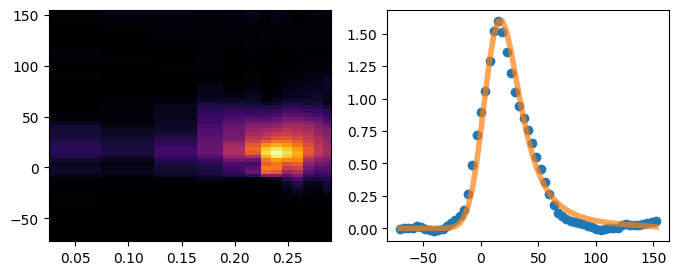

In [27]:
c_set = [100,200,300,400,500,600,700]
Delta_set = [0.1,3,6,9,12,15]
Gamma = 20

temperature_char = 'T21K'
temperature = 21
temperature_meV = 21*0.086


x = exp.Pure_CDF_data['T21K']['X']
y = exp.Pure_CDF_data['T21K']['Y']
cdf = exp.Pure_CDF_data['T21K']['Z_subtracted']

# plot it with inferno cmap
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax[0].pcolor(x,y,cdf,cmap='inferno', vmin = 0)
q_index = 8
z_data = cdf[:,q_index]
ax[1].plot(y,z_data,'o')
c_index = 2
Delta_index = 3
z_fitting = mf.fun_S_convoluted(x[q_index],y, c_set[c_index], np.max(cdf[:,q_index]), Gamma, Delta_set[Delta_index], temperature_meV)
ax[1].plot(y,z_fitting,linewidth=4, alpha = 0.7)
print(chi_square(z_data,z_fitting))


In [ ]:
np.shape(Y)

(61,)